In [2]:
import ugradio #if remote git clone this module
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import signal

No module named 'rtlsdr'


# Used code from Sec_5_Better_Data.ipynb

In [5]:
#Load Data
test_data = pd.read_csv('data/alias_data') #load dataframe


In [6]:
#experimentation cell

titles = test_data.columns[1:7] #datatype is a pandas index with string values; can pull strings by indexing
times = np.array(range(len(test_data.loc[:, f'{titles[0]}']))) #initialize arbitrary numpy array to make up x-axis for plot
#normalize x-axis, sample rate of 1024 kHz and 2048 samples means sample taken every 2ms
times = 2*times

#r'Power Spectrum $(\nu = 100 kHz, \nu_s ='+titles[k][5:]+'kHz)$'
#times = range(len(test_data.loc[:, f'{titles[0]}']))
titles

Index(['data', 'data2', 'data3', 'data4', 'data5', 'data6'], dtype='object')

In [7]:
def volt_spec(sample):
    data = test_data[sample]
    fourier = ugradio.dft.dft(data)
    return fourier

def power_spec(sample): #inputs: fgen freq, sample rate (must be strings)
    volt = volt_spec(sample)
    return volt[0], abs(volt[1])**2 #returns power spectrum of specified frequencies

# Waveforms in time domain

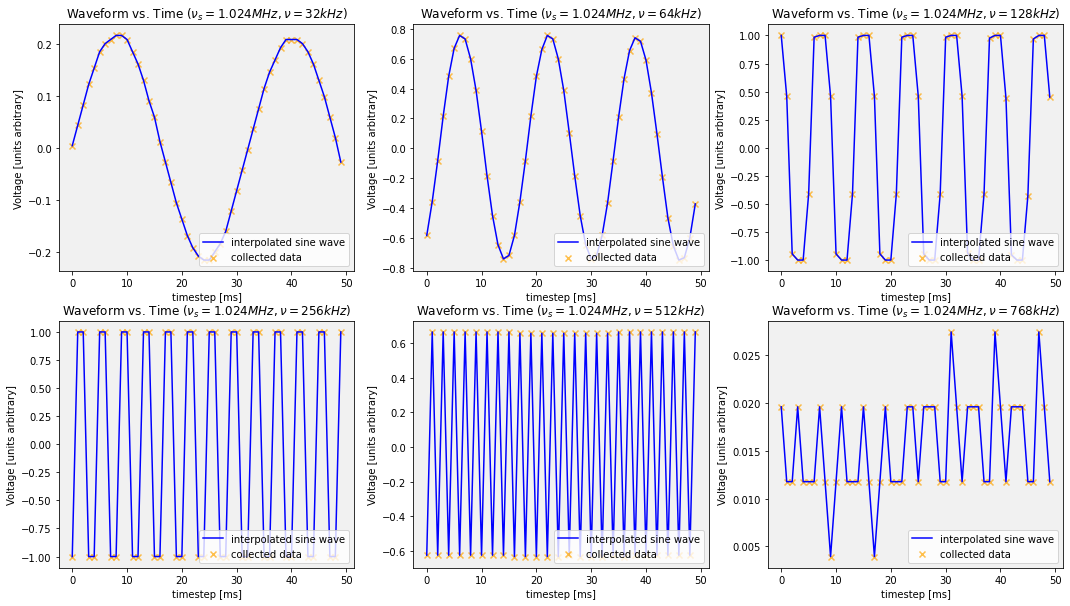

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white')
plt.title('Power Spectra')

# alias_data doesn't have the naming scheme as data used for this code so need a list of frequencies used
freq = [32, 64, 128, 256, 512, 768]

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Waveform vs. Time $(\nu_s = 1.024 MHz, \nu ='+str(freq[k])+'kHz)$')
        hax.plot(times[:50], test_data.loc[:, f'{titles[k]}'][:50], color = 'blue', label='interpolated sine wave')
        hax.scatter(times[:50], test_data.loc[:, f'{titles[k]}'][:50], color = 'orange', marker = 'x', alpha = 0.7, label='collected data')
        #used blue-orange color scheme out of color-blindness considerations^
        hax.set_facecolor('#f1f1f1')
        hax.set_xlabel('timestep [ms]')
        hax.set_ylabel(r'Voltage [units arbitrary]')
        hax.legend(loc = 4, )

# Power Spectra

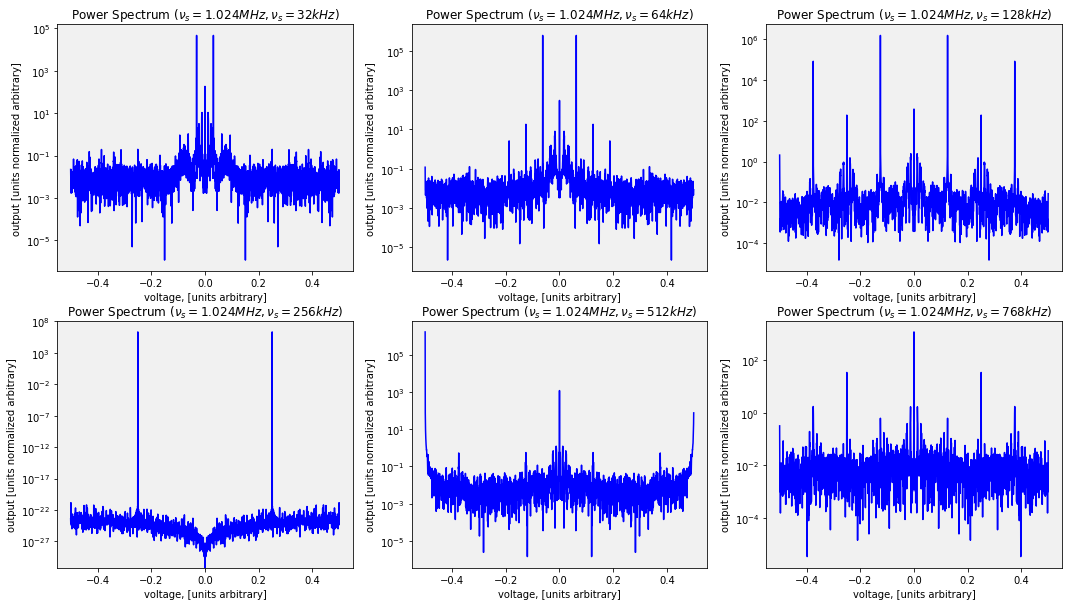

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white')
plt.title('Power Spectra')

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Power Spectrum $(\nu_s = 1.024 MHz, \nu_s ='+str(freq[k])+'kHz)$')
        hax.plot(power_spec(f'{titles[k]}')[0], power_spec(f'{titles[k]}')[1].real, color = 'blue', label='real')
        #used blue-orange color scheme out of color-blindness considerations^
        hax.set_yscale('log') #comment this line out for linear scale
        hax.set_facecolor('#f1f1f1')
        hax.set_xlabel('voltage, [units arbitrary]')
        hax.set_ylabel(r'output [units normalized arbitrary]')

# Voltage Spectra

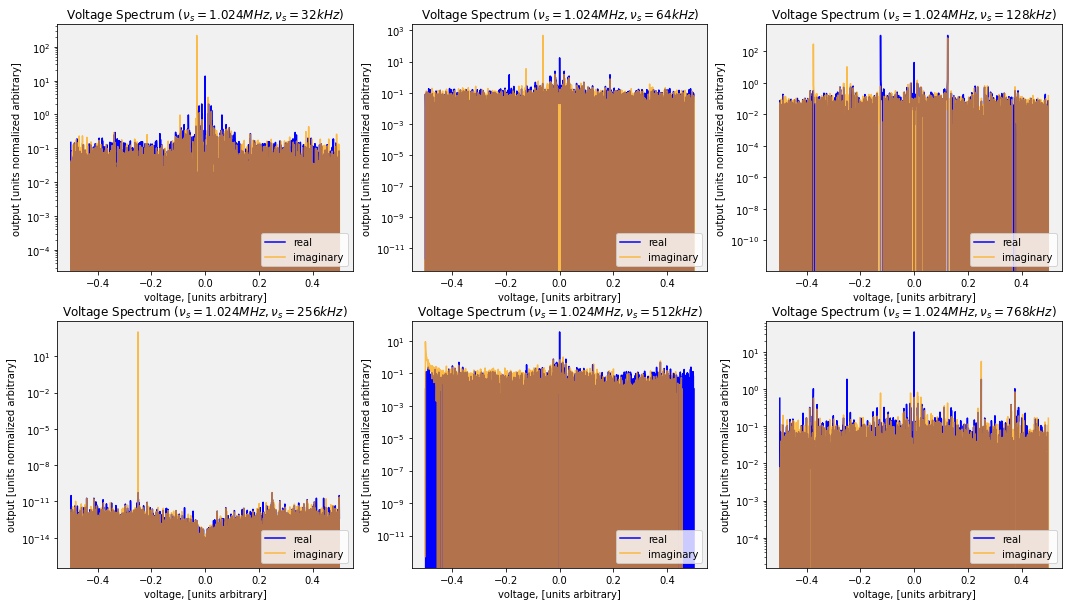

In [13]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white')
plt.title('Voltage Spectra')

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Voltage Spectrum $(\nu_s = 1.024 MHz, \nu_s ='+str(freq[k])+'kHz)$')
        hax.plot(volt_spec(f'{titles[k]}')[0], volt_spec(f'{titles[k]}')[1].real, color = 'blue', label='real')
        hax.plot(volt_spec(f'{titles[k]}')[0], volt_spec(f'{titles[k]}')[1].imag, color = 'orange', alpha = 0.7, label='imaginary')
        #used blue-orange color scheme out of color-blindness considerations^
        hax.set_yscale('log') #comment this line out for linear scale
        hax.set_facecolor('#f1f1f1')
        hax.set_xlabel('voltage, [units arbitrary]')
        hax.set_ylabel(r'output [units normalized arbitrary]')
        hax.legend(loc = 4, )

In [19]:
pspec1 = power_spec(f'{titles[0]}') #load data in this cell so we don't have to load it repeatedly
pspec5 = power_spec(f'{titles[4]}')
inv_pspec1 = ugradio.dft.idft(pspec1[1])
inv_pspec5 = ugradio.dft.idft(pspec5[1])

/Users/nolanlee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/nolanlee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/nolanlee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


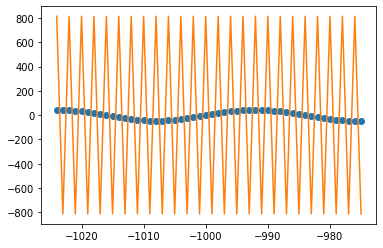

In [20]:
plt.plot(inv_pspec1[0][:50], inv_pspec1[1][:50])
plt.plot(inv_pspec5[0][:50], inv_pspec5[1][:50])
plt.scatter(inv_pspec1[0][:50], inv_pspec1[1][:50])

/Users/nolanlee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 100.0)

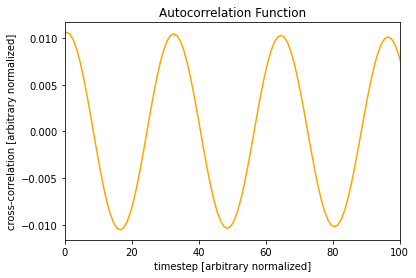

In [21]:
scipyacf = signal.correlate(inv_pspec1[1], inv_pspec1[1], mode='full')
x = np.linspace(-2047, 2048, 4095)
plt.xlabel('timestep [arbitrary normalized]')
plt.ylabel('cross-correlation [arbitrary normalized]')
plt.plot(x, scipyacf * 0.5e-8, color='orange')
plt.title('Autocorrelation Function')
plt.xlim(0, 100)

/Users/nolanlee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 100.0)

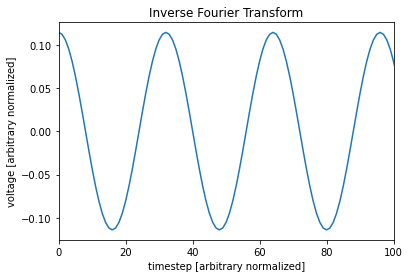

In [22]:
plt.title('Inverse Fourier Transform')
plt.xlabel('timestep [arbitrary normalized]')
plt.ylabel('voltage [arbitrary normalized]')
plt.plot(inv_pspec1[1] * (1/400))
plt.xlim(0, 100)

## Boilerplate Example from Cole's Original Notebook

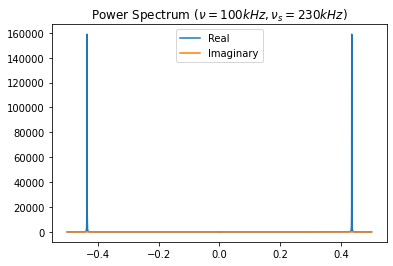

In [13]:
power_100_230 = power_spec(f'{titles[0]}')
plt.figure()
plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 230 kHz)$')
plt.plot(power_100_230[0], power_100_230[1].real, label = 'Real')
plt.plot(power_100_230[0], power_100_230[1].imag, label = 'Imaginary')
plt.legend()

## Section 5.6